<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/A_B_testing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.kaggle.com/datasets/adarsh0806/ab-testing-practice/data


The AB Testing Dataset provided here is a self-generated synthetic dataset created using Random Sampling techniques provided by the Numpy Package. The dataset emulates information regarding visits made by users on an imaginary retail website around the United Kingdom. The users are found to be in two groups, A and B, each of which represents a control group and treatment group respectively. Imagine that the retail company needs to test out a new change on the website which is, "Do people spend time on a website if the website background color is White or Black". This question is asked to achieve the end goal of the analysis which is to improve user engagement, whether it is through a purchase, signing up, etc.

So, in this scenario, let the color 'White' be assigned to Group A which is the default setting for the background color on the website, representing the control group. Also, let the color 'Black' be equivalent to Group B which is the newer setting to be tested. And the main goal is to understand whether there is a significant improvement in website views if the newer setting is applied. This can be answered through the use of A/B Testing.

This dataset is placed to help with practicing A/B Testing as it is a very important topic for Data Analyst prospects. The column description is given as follows:

User ID: Serves as an identifier for each user.

Group: Contains both the control group (A) and treatment group (B).

Page Views: Number of pages the user viewed during their session.

Time Spent: The total amount of time, in seconds, that the user spent on the site during the session.

Conversion: Indicates whether a user has completed a desired action (Yes/No).

Device: Type of device used to access the website.

Location: The country in UK where the user is based in.

The dataset can also be used to derive segment-based insights through appropriate data visualization based on device type and location.

In [ ]:
##Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import random

In [2]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving ab_testing.xlsx to ab_testing.xlsx


In [6]:
#display data
import pandas as pd
df = pd.read_excel("ab_testing.xlsx")
df

,user_id,group,page_views,Time_spent,conversion,device,location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [7]:
##find information from the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     5000 non-null   int64 
 1   group       5000 non-null   object
 2   page_views  5000 non-null   int64 
 3   Time_spent  5000 non-null   int64 
 4   conversion  5000 non-null   object
 5   device      5000 non-null   object
 6   location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [ ]:
##description of the entire dataset
df.describe()

,user_id,page_views,time_spent,converted_int
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600,0.097000
std,2869.153773,4.022465,118.254153,0.295987
min,10001.000000,1.000000,40.000000,0.000000
25%,12456.250000,4.000000,137.000000,0.000000
50%,14858.500000,8.000000,243.000000,0.000000
75%,17379.750000,11.000000,346.000000,0.000000
max,19995.000000,14.000000,449.000000,1.000000


In [ ]:
df.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace = True)
df

,user_id,group,page_views,Time_spent,conversion,device,location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [14]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df

,user_id,group,page_views,time_spent,conversion,device,location,converted_int
0,14292,B,3,424,No,Mobile,Northern Ireland,0
1,11682,A,9,342,No,Mobile,Scotland,0
2,19825,A,2,396,No,Desktop,Northern Ireland,0
3,16080,B,4,318,No,Desktop,Wales,0
4,18851,A,1,338,Yes,Desktop,Scotland,1
...,...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales,0
4996,18084,B,10,313,No,Desktop,Northern Ireland,0
4997,12063,A,11,156,No,Desktop,England,0
4998,18647,B,13,346,No,Desktop,Wales,0


In [15]:
##finding data types across the data
df.dtypes

,0
user_id,int64
group,object
page_views,int64
time_spent,int64
conversion,object
device,object
location,object
converted_int,int64


In [16]:
#create a new column for converts from both groups
df['converted_int']= df['conversion'].apply(lambda x: 1 if x == 'Yes' else 0)
df

,user_id,group,page_views,time_spent,conversion,device,location,converted_int
0,14292,B,3,424,No,Mobile,Northern Ireland,0
1,11682,A,9,342,No,Mobile,Scotland,0
2,19825,A,2,396,No,Desktop,Northern Ireland,0
3,16080,B,4,318,No,Desktop,Wales,0
4,18851,A,1,338,Yes,Desktop,Scotland,1
...,...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales,0
4996,18084,B,10,313,No,Desktop,Northern Ireland,0
4997,12063,A,11,156,No,Desktop,England,0
4998,18647,B,13,346,No,Desktop,Wales,0


In [20]:
##page views distributions per group
pageviews_mean_distribution= df.groupby("group")[["page_views"]].mean()

# Convert the Series to a DataFrame and reset the index
pageviews_mean_distribution_df = pd.DataFrame(pageviews_mean_distribution).reset_index()

# Rename the columns
pageviews_mean_distribution_df.columns = ['group', 'values']
pageviews_mean_distribution_df

,group,values
0,A,7.581580
1,B,7.492946


In [21]:
#time spent distribution per group
timespent_mean_distribution= df.groupby("group")['time_spent'].mean()

# Convert the Series to a DataFrame and reset the index
timespent_mean_distribution_df = pd.DataFrame(timespent_mean_distribution).reset_index()

# Rename the columns
timespent_mean_distribution_df.columns = ['group', 'values']
timespent_mean_distribution_df

,group,values
0,A,241.733227
1,B,243.303910


In [ ]:
# Investigate the elements in each column
for column in df:
  unique_values = np.unique(df[column].astype(str))  # Indented properly
  nr_values = len(unique_values)  # Indented properly
  if len(unique_values) <= 14:
    print("The number of values for feature '{}' is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("The number of values for feature '{}' is: {}".format(column, nr_values))

The number of values for feature 'user_id' is: 5000
The number of values for feature 'group' is: 2.....['A' 'B']
The number of values for feature 'page_views' is: 14.....['1' '10' '11' '12' '13' '14' '2' '3' '4' '5' '6' '7' '8' '9']
The number of values for feature 'time_spent' is: 410
The number of values for feature 'conversion' is: 2.....['No' 'Yes']
The number of values for feature 'device' is: 2.....['Desktop' 'Mobile']
The number of values for feature 'location' is: 4.....['England' 'Northern Ireland' 'Scotland' 'Wales']
The number of values for feature 'converted_int' is: 2.....['0' '1']


In [23]:
##device distributions per group
device_distribution= df['device'].value_counts()

# Convert the Series to a DataFrame and reset the index
device_distribution_df = pd.DataFrame(device_distribution).reset_index()

# Rename the columns
device_distribution_df.columns = ['group', 'values']
device_distribution_df

,group,values
0,Desktop,2538
1,Mobile,2462


  group  values
0     A    2519
1     B    2481
****************************************************************************************************


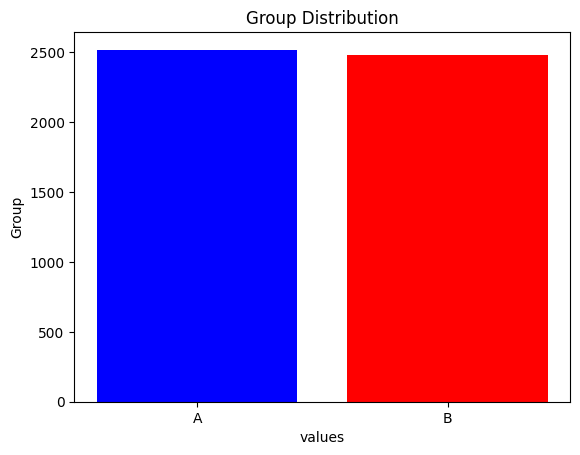

In [31]:
import matplotlib.pyplot as plt
#Group Distribution
group_distribution= df.group.value_counts()

# Convert the Series to a DataFrame and reset the index
group_distribution_df = pd.DataFrame(group_distribution).reset_index()

# Rename the columns
group_distribution_df.columns = ['group', 'values']
print(group_distribution_df)

print('*'*100)

#Graph representation
plt.bar(df.group.value_counts().index, df.group.value_counts(),color =['blue','red'])
plt.title('Group Distribution')
plt.ylabel('Group')
plt.xlabel('values')
plt.show()

In [39]:
# Count of total conversions (1s) for both groups
conversion_counts = df.groupby('group')['converted_int'].apply(lambda x: (x ==1).sum())
conversion_counts= pd.DataFrame({'group':conversion_counts.index, 'values':conversion_counts.values})
conversion_counts

,group,values
0,A,136
1,B,349


In [41]:
# Count of total non conversions (0s) for both groups
non_conversion_counts = df.groupby('group')['converted_int'].apply(lambda x: (x ==0).sum())
non_conversion_counts= pd.DataFrame({'group':non_conversion_counts.index, 'values':non_conversion_counts.values})
non_conversion_counts

,group,values
0,A,2383
1,B,2132


Clickthrough Rate for Control group(Group A)

In [43]:
# Filter the DataFrame for the treatment group
# treatment group users
control_group_A = df.query("group == 'A'")


# click through rate for experiment group users
clickthrough_rate_ctrl_A = control_group_A[control_group_A['converted_int'] == 1]['user_id'].nunique()/control_group_A[control_group_A['converted_int'] == 0]['user_id'].nunique()
print(float(clickthrough_rate_ctrl_A))


0.0570709190096517


Clickthrough Rate for Treatment group(Group B)

In [46]:
# Assuming your DataFrame is called 'df'

# Filter the DataFrame for the experiment group
#Treatment group(Group B) users
treatment_group_B = df.query("group =='B'")


# click through rate for treatment group users
clickthrough_rate_tr_B = treatment_group_B[treatment_group_B['converted_int'] == 1]['user_id'].nunique()/treatment_group_B[treatment_group_B['converted_int'] == 0]['user_id'].nunique()

print(float(clickthrough_rate_tr_B))

0.16369606003752346


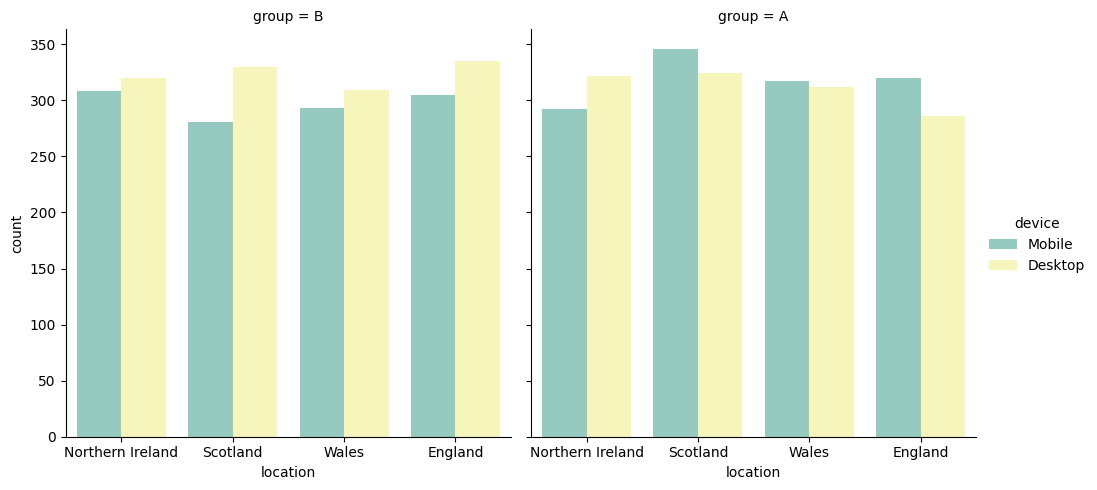

In [48]:
import seaborn as sns
# Looping through all the features by our y variable - see if there is relationship
features = ['location']

# Use catplot instead of countplot for creating subplots based on 'group'
for f in features:
  sns.catplot(x=f, hue='device', data=df, kind='count', palette='Set3', col='group')
  plt.show()

In [49]:
#Calculating for the conversion rates, sample sizes & conversion of both groups
conversion_counts = df.groupby('group')['converted_int'].sum()

#Indicating sample sizes
sample_sizes = df['group'].value_counts()

#Conversion rates formular
conversion_rates = (conversion_counts/sample_sizes)*100

print(f"Conversion Rates:{conversion_rates}")
print(f"\nConversion Counts:{conversion_counts}")
print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:group
A     5.398968
B    14.066909
dtype: float64

Conversion Counts:group
A    136
B    349
Name: converted_int, dtype: int64

Sample Sizes: group
A    2519
B    2481
Name: count, dtype: int64


A/B TESTING
Test 1

*Null Hypothesis (H0): There is no significant association that the background color is affecting people's behaviour between the (Control A) and (Experimental B).

*Alternative Hypothesis (H1): There is a significant association that the background color is affecting people's behaviour between the (Control A) and (Experimental B).

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Get conversion counts as a list or array
conversion_counts = df.groupby('group')['converted_int'].sum().values

total_users = df['group'].value_counts()
z_stat, p_val = proportions_ztest(count = conversion_counts, nobs = total_users)


print(f"z_statistic: {z_stat}")
print(f"p_value: {p_val}")

print('*'*120)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.")
else:
    print("Fail to reject the null hypothesis: There is no significant association that the background color is affecting people's behaviour.")

z_statistic: -10.354488520266216
p_value: 3.9931511894201938e-25
************************************************************************************************************************
Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.


Test2:

CHI-SQUARE TEST

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['group'], df['conversion'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.")
else:
    print("Fail to reject the null hypothesis: There is no significant association that the background color is affecting people's behaviour.")

Chi-square statistic: 106.22812337440538
P-value: 6.571736018334222e-25
Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.


In conclusion, after a careful observation between two sample test & Chi sqaure test, one could clearly indicate that we accept accept our Alternative Hypothesis due to the fact that, there is a significant association that the background color is affecting people's behaviour impacting the improvement in views on through company's website through purchases and signing which in effect increases conversion rates from one stage to the other.